In [1]:
import os
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from keras.models import Model, load_model
model_a = load_model('resnet.h5')

def load_image(img_url):
    image = load_img(img_url,target_size=(512,512))
    image = img_to_array(image)
    image /= 255
    image = np.expand_dims(image,axis=0)
    return image

Using TensorFlow backend.


In [2]:
import numpy as np
image1 = load_img('0001.png',target_size=(512,512))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

1

In [3]:
model_a.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

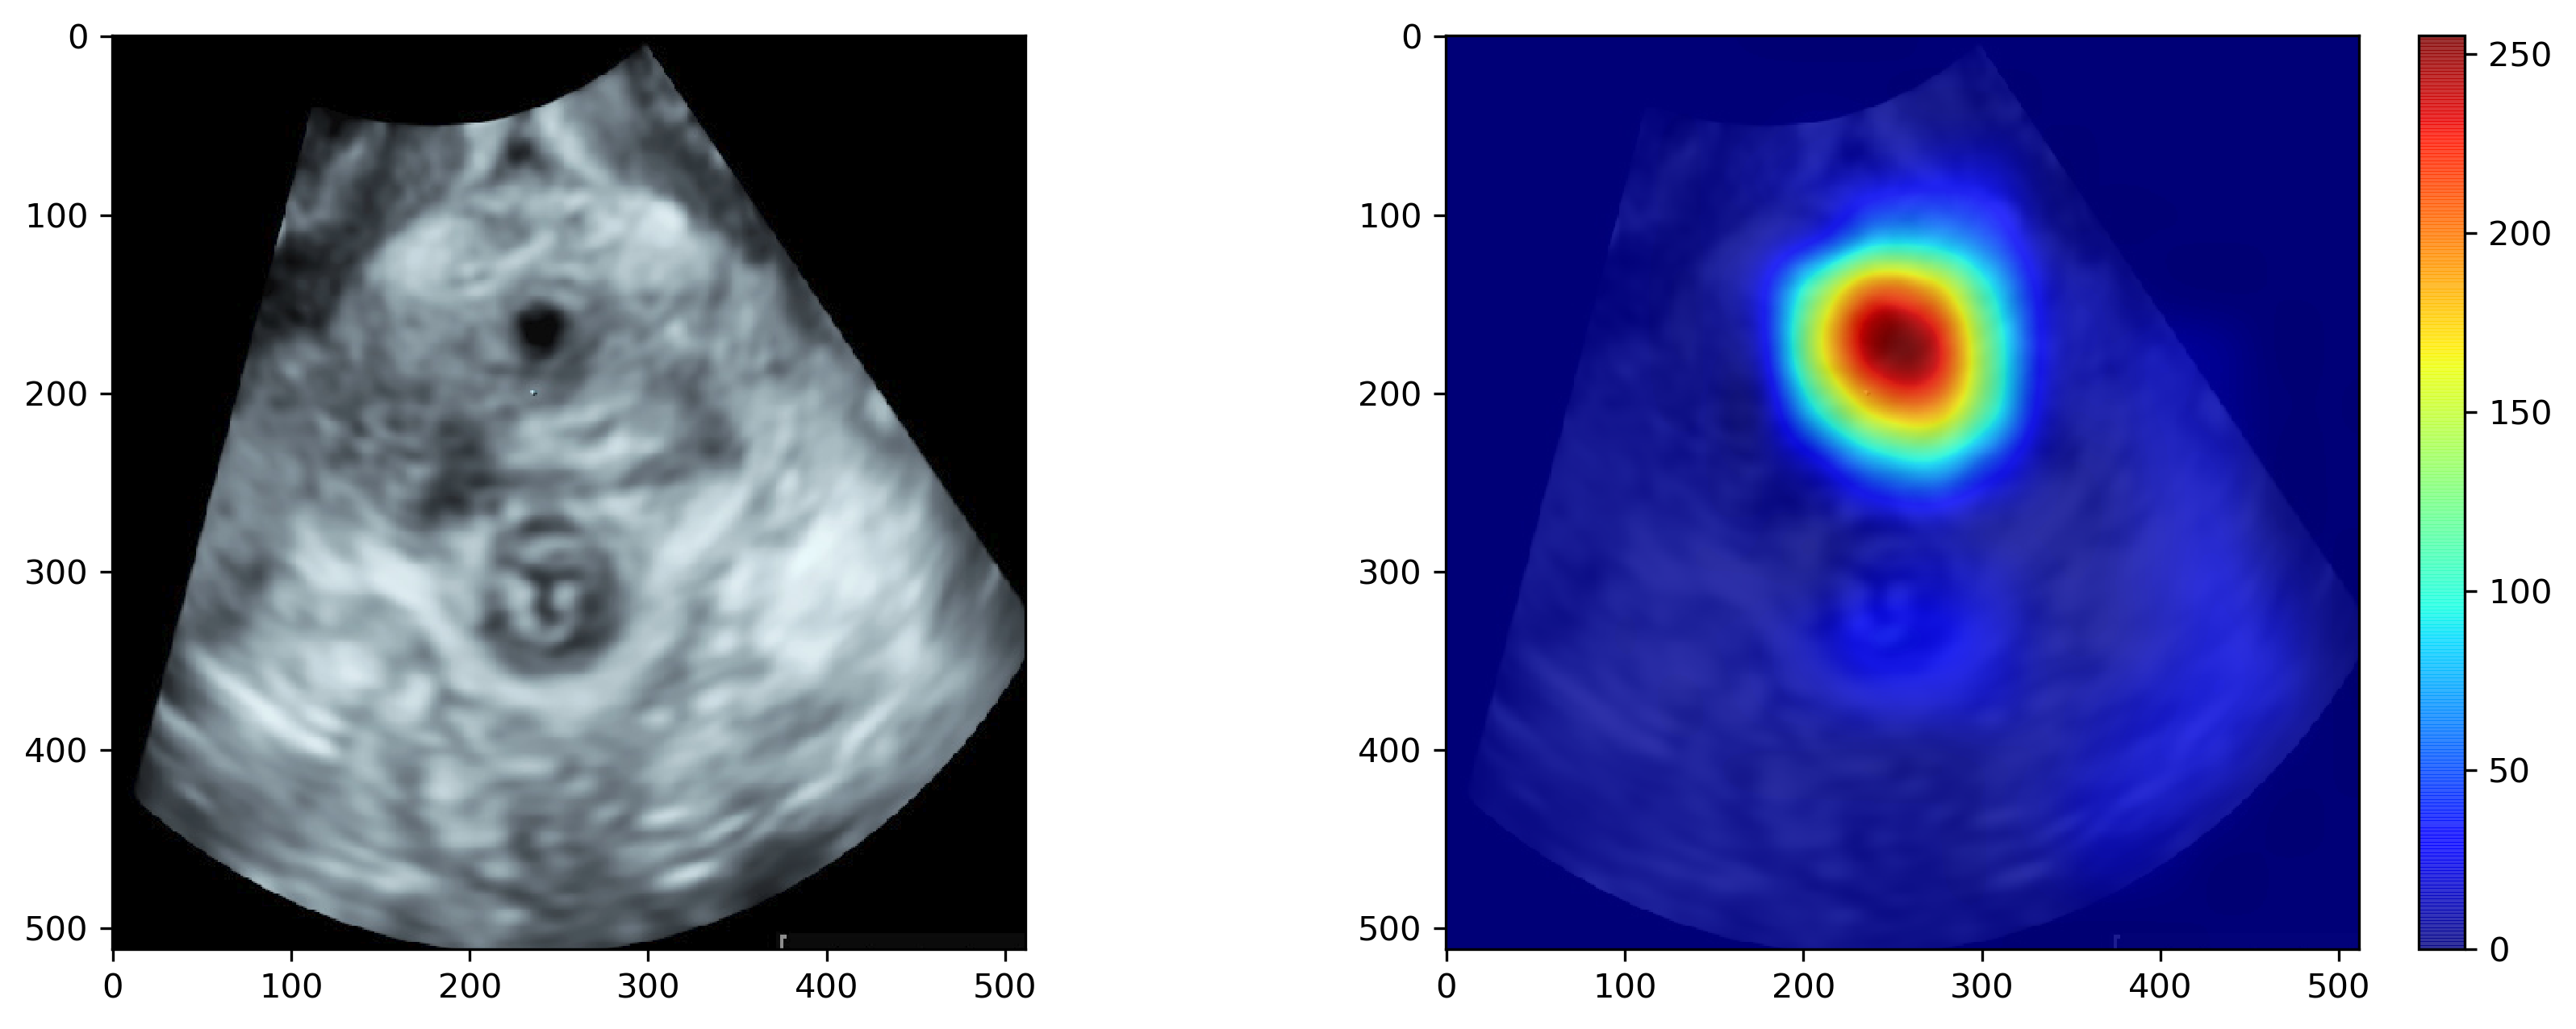

In [17]:

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "res5c_branch2c") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)